###Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv(r"C:\Users\LOAN_PREDICTION\loan_data.csv")

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.shape

(614, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Handling Categorical missing values
fillna=['Dependents','Married','Gender','Self_Employed','Credit_History','Loan_Amount_Term']
for i in fillna:
    df[i].fillna(df[i].mode().iloc[0], inplace=True)


In [8]:
# Handling Continuous missing values
df['LoanAmount'].median()

128.0

In [9]:
 df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

<Axes: >

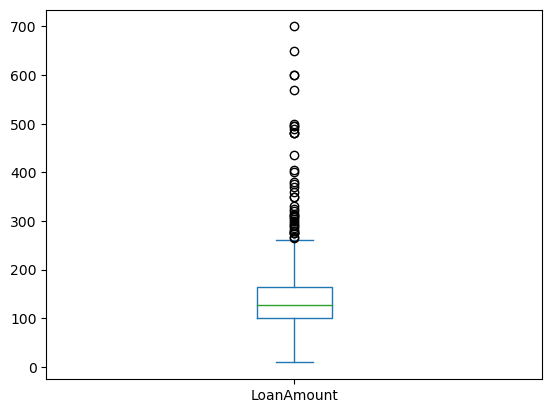

In [10]:
df['LoanAmount'].plot(kind='box')

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [13]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


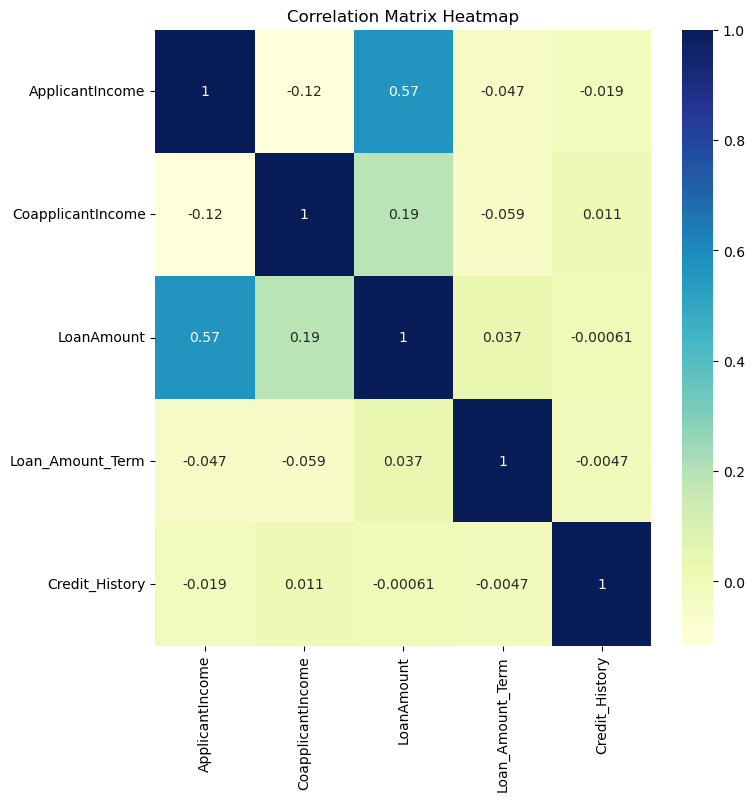

In [14]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.title('Correlation Matrix Heatmap')
plt.show()

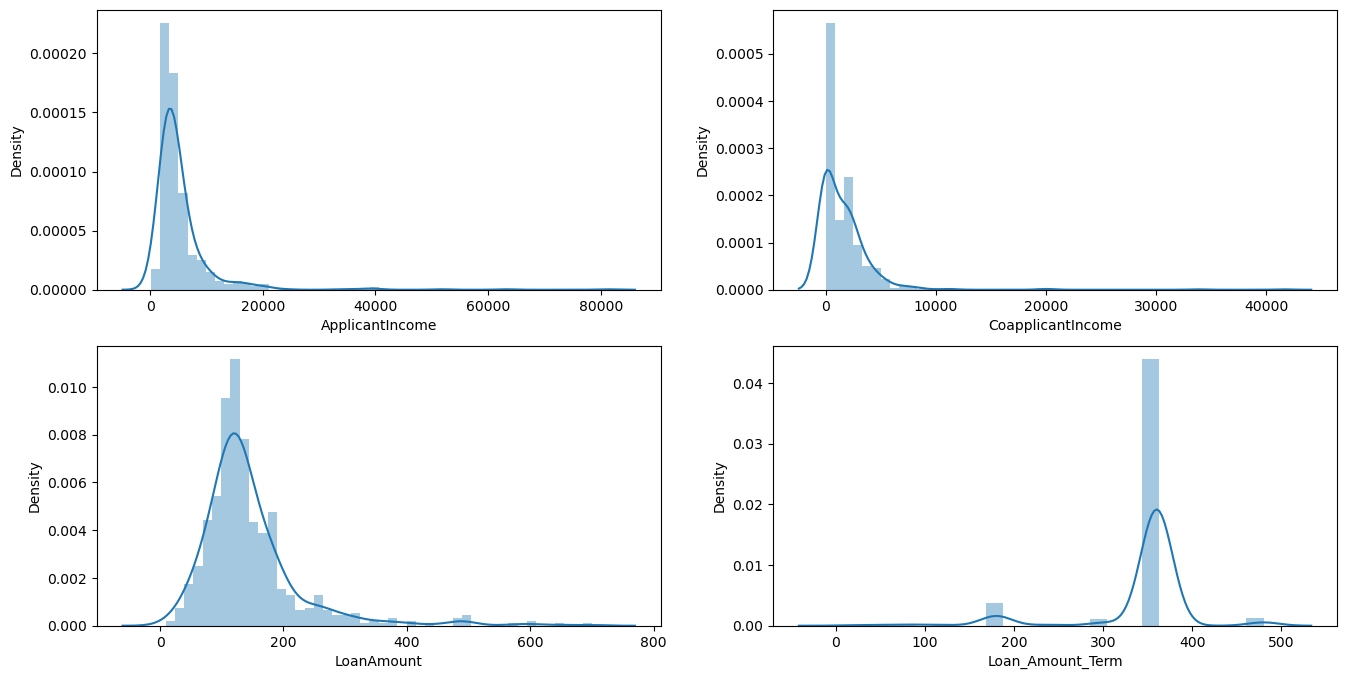

In [15]:
cols_to_check = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
for i, col in enumerate(cols_to_check):
    row_idx = i // 2  
    col_idx = i % 2 
    sns.distplot(df[col], ax=axs[row_idx, col_idx])
plt.show()


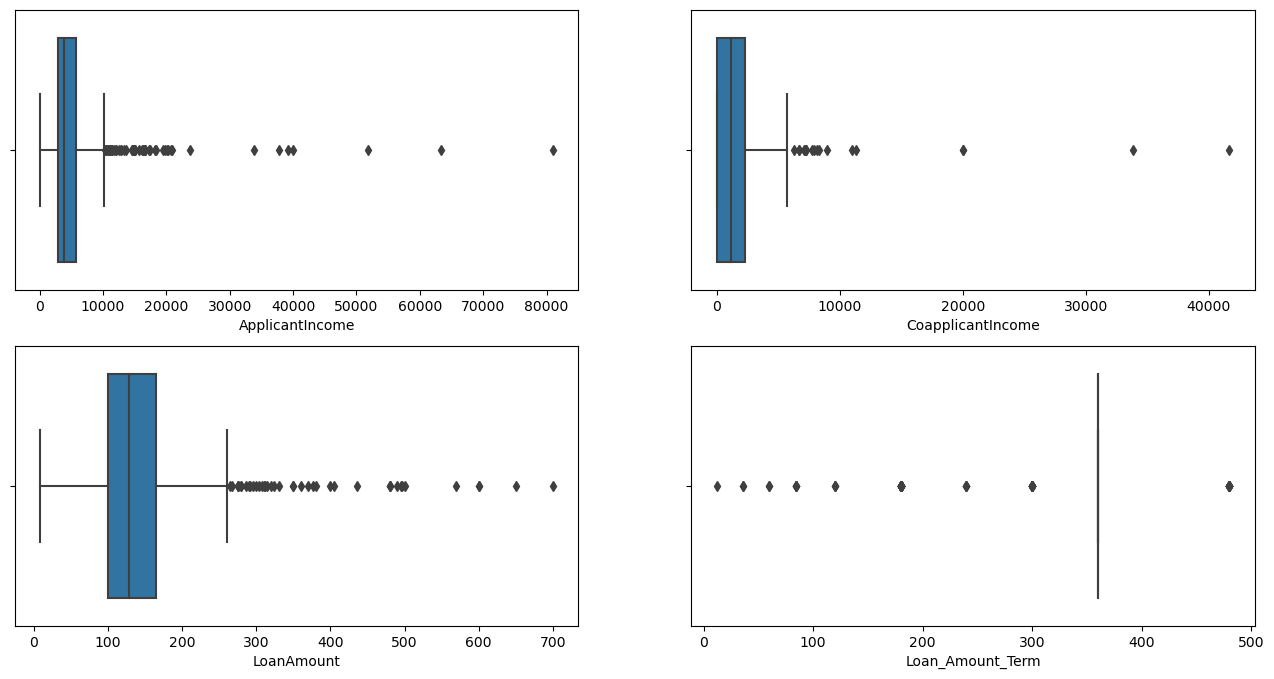

In [16]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
for i, col in enumerate(cols_to_check):
    sns.boxplot(x=df[col], ax=axs.flat[i])
plt.show()

In [17]:
# Drop Loan_ID as it is having no impact on prediction
df.drop(["Loan_ID"],axis=1,inplace=True)

In [18]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

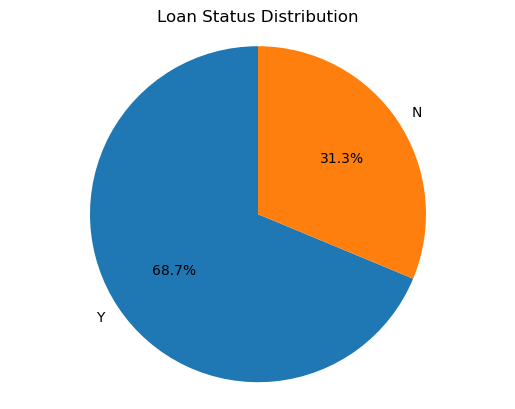

In [19]:
# Checking for Class Imbalnce
loan_status_counts = df['Loan_Status'].value_counts()

# Get the counts and labels
counts = loan_status_counts.values
labels = loan_status_counts.index

# Plot the pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures a circular pie
plt.title('Loan Status Distribution')

# Display the chart
plt.show()

###Encoding Categorical variables

In [20]:
#Listing features that are categrical and binary in nature
binary_features = []

# Iterate over each column in the DataFrame
for column in df.columns:
    if df[column].dtype == 'object' and len(df[column].unique()) == 2:
        binary_features.append(column)

# Display the binary categorical features
print("Binary Categorical Features:")
for feature in binary_features:
    print(feature)

Binary Categorical Features:
Gender
Married
Education
Self_Employed
Loan_Status


In [21]:
# Perform Label encoding on binary features
encoder = LabelEncoder()

for feature in binary_features:
    df[feature] = encoder.fit_transform(df[feature])

In [22]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,Urban,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,Urban,1


In [23]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [24]:
df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [25]:
def frequency_encoding(df, features):
    for feat in features:
        freq = df[feat].value_counts(normalize=True)
        mapping_dict = freq.to_dict()
        df[feat] = df[feat].map(mapping_dict)
    return df

nominal_features = ['Dependents','Property_Area']

df = frequency_encoding(df, nominal_features)

In [26]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.586319,0,0,5849,0.0,128.0,360.0,1.0,0.328990,1
1,1,1,0.166124,0,0,4583,1508.0,128.0,360.0,1.0,0.291531,0
2,1,1,0.586319,0,1,3000,0.0,66.0,360.0,1.0,0.328990,1
3,1,1,0.586319,1,0,2583,2358.0,120.0,360.0,1.0,0.328990,1
4,1,0,0.586319,0,0,6000,0.0,141.0,360.0,1.0,0.328990,1


In [27]:
df.shape

(614, 12)

In [28]:
# Seperating independent features
X=df.drop(['Loan_Status'],axis=1)

In [29]:
# Seperating target variable
y=df['Loan_Status']

In [30]:
# Sccaling the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [31]:
X_scaled

array([[ 0.47234264, -1.37208932,  0.83593835, ...,  0.2732313 ,
         0.41173269, -0.2277579 ],
       [ 0.47234264,  0.72881553, -1.10477545, ...,  0.2732313 ,
         0.41173269, -1.26330105],
       [ 0.47234264,  0.72881553,  0.83593835, ...,  0.2732313 ,
         0.41173269, -0.2277579 ],
       ...,
       [ 0.47234264,  0.72881553, -1.10477545, ...,  0.2732313 ,
         0.41173269, -0.2277579 ],
       [ 0.47234264,  0.72881553, -1.1122976 , ...,  0.2732313 ,
         0.41173269, -0.2277579 ],
       [-2.11710719, -1.37208932,  0.83593835, ...,  0.2732313 ,
        -2.42876026,  1.16797417]])

In [32]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

In [34]:
# Split the data to hold out validation data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,stratify=y,test_size=0.2,random_state=42)

In [36]:
# Intitalize the desired model
lgb=LGBMClassifier(learning_rate=0.1, n_estimators=100)

# Train the model
lgb.fit(X_train,y_train)

LGBMClassifier()

In [37]:
# Predicting validation set
y_pred=lgb.predict(X_test)

In [38]:
# Evaluating model's performance through various performance metrics
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 score: ",f1_score(y_test, y_pred))
print("Accuracy: ", accuracy_score(y_test,y_pred))

Precision:  0.8488372093023255
Recall:  0.8588235294117647
F1 score:  0.8538011695906433
Accuracy:  0.7967479674796748


### Implementation using Neural Networks

In [39]:
# Model Building
model = Sequential()
model.add(Dense(20, activation='relu', input_shape=(11,)))# input_dim is the dimension of your input data
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [40]:
# Summarizing the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                240       
                                                                 
 dense_1 (Dense)             (None, 16)                336       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 721
Trainable params: 721
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
# Train the model
model_history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=50)

Epoch 1/50
16/16 [==============================] - 1s 10ms/step - loss: 0.6860 - accuracy: 0.6029 - val_loss: 0.6606 - val_accuracy: 0.6748
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6546 - accuracy: 0.6741 - val_loss: 0.6314 - val_accuracy: 0.6829
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6318 - accuracy: 0.6823 - val_loss: 0.6073 - val_accuracy: 0.6829
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6108 - accuracy: 0.6864 - val_loss: 0.5848 - val_accuracy: 0.6829
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.6884 - val_loss: 0.5624 - val_accuracy: 0.6911
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.6965 - val_loss: 0.5395 - val_accuracy: 0.6992
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.7128 - val_loss: 0.5258 - val_accuracy: 0.7317
Epoch 8/50
16/16 [=

In [43]:
# Predicting validation set
prediction=model.predict(X_test)

4/4 [==============================] - 0s 1ms/step


In [44]:
prediction

array([[0.03475773],
       [0.90511733],
       [0.77232945],
       [0.79204136],
       [0.9267605 ],
       [0.7328754 ],
       [0.8546482 ],
       [0.82861304],
       [0.5649621 ],
       [0.7922359 ],
       [0.9681724 ],
       [0.94189334],
       [0.8931975 ],
       [0.91689897],
       [0.0290886 ],
       [0.04713382],
       [0.6325268 ],
       [0.08346262],
       [0.12949157],
       [0.8187542 ],
       [0.24203238],
       [0.6137331 ],
       [0.4947331 ],
       [0.9603604 ],
       [0.975292  ],
       [0.9076119 ],
       [0.58871233],
       [0.88978356],
       [0.03858565],
       [0.7683128 ],
       [0.7734963 ],
       [0.88693124],
       [0.8091295 ],
       [0.9281255 ],
       [0.49394947],
       [0.8893498 ],
       [0.0330828 ],
       [0.82092303],
       [0.78897566],
       [0.9757619 ],
       [0.76016456],
       [0.8376372 ],
       [0.8778008 ],
       [0.7724616 ],
       [0.7333792 ],
       [0.7222435 ],
       [0.9536384 ],
       [0.746

In [45]:
type(prediction)

numpy.ndarray

In [46]:
type(y_test)

pandas.core.series.Series

In [47]:
y_test

150    0
559    1
598    1
235    1
145    1
      ..
363    1
280    0
7      0
289    1
373    0
Name: Loan_Status, Length: 123, dtype: int32

In [48]:
# As the predictions are in predicted probabilities for each sample round them to get the binary prediction
binary_predictions = [1 if pred > 0.5 else 0 for pred in prediction]

In [49]:
# Accuracy of validation set
accuracy_score(y_test,binary_predictions)

0.8536585365853658

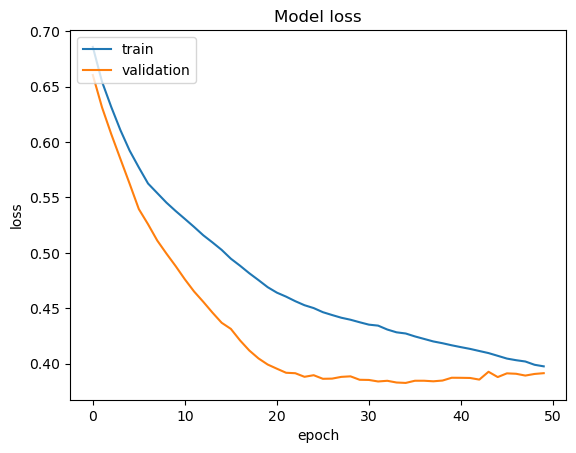

In [50]:
# Visualize the train loss and validation loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

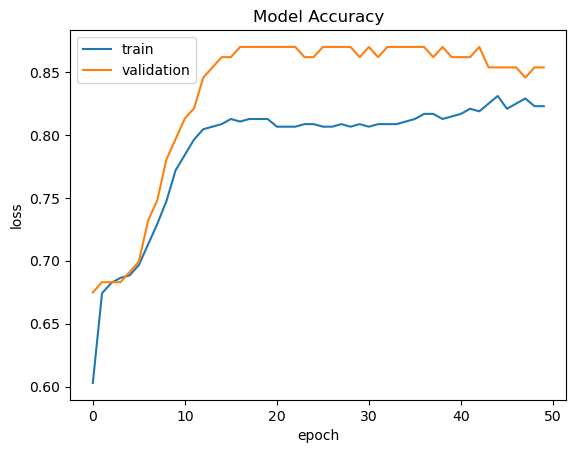

In [51]:
# Visualizing model performance during different epochs
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')
plt.show()

###Inferences:
-->Light Gradient Boosting Model(Tree-Based model) predicted Loan_Status with 80% accuracy
-->Neural networks outperformed LightGBM with 82% Accuracy.